In [ ]:
#Incluindo libs necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import datasets
from sklearn.cluster import SpectralClustering, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from itertools import combinations

In [ ]:
#Importando dados e removendo atributo target
dfData = pd.read_csv("dataset1.csv").drop(columns = "target")

#Exibindo formato dos dados
print(dfData.shape)
print(dfData.columns)
dfData.head()

#Definindo conjunto de atributos
atributos = [ f'V{x}' for x in range(1,14) ]

#Convertendo tudo para float para remover warnings
def int_to_float(c):
    if isinstance(c, float):
        return c
    else:
        try:
            return float(c)
        except:
            return None

for atributo in atributos:
    dfData[atributo] = dfData[atributo].apply(int_to_float)



In [ ]:
#Plotando dados
sns.pairplot(dfData)
plt.show()

In [ ]:
np.random.seed(1001001)


#
sample_size=150

# 
best_sil = -999

data = dfData

for init in ['k-means++', 'random']:
    for k in range(3,8):
        estimator = KMeans(init=init, n_clusters=k, n_init=10, max_iter=100)
        #Rodando kMeans com todas as permutacoes de features possiveis para necontrar a melhor
        for i in range(1,len(atributos)+1):
            for comb in combinations(atributos,i):
                newDf = dfData.filter(comb,axis=1)  # copiando apenas os atributos que vamos usar
                data = scale(newDf)
                estimator.fit(data)
                data = scale(dfData)
                sil = metrics.silhouette_score(data, estimator.labels_,
                                               metric="euclidean",
                                               sample_size=sample_size)
                if sil > best_sil:
                    bestEstimator = estimator
                    best_sil = sil
                    bestComb = comb
                    best_data = pd.DataFrame(data)
                    
#Exibindo resultados
print('better estimator silhouette: %0.4f (%d clusters, %s)' % (best_sil, bestEstimator.n_clusters, bestEstimator.init))
print(bestComb)
dfData['label'] = bestEstimator.labels_
best_data['label'] = bestEstimator.labels_

In [ ]:
#Plot 2D de cada atributo colorido por cluster
sns.pairplot(data=dfData, vars=['V1'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V2'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V3'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V4'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V5'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V6'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V7'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V8'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V9'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V10'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V11'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V12'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V13'], hue='label')
plt.show()

### Analize inicial:

Pode-se notar que certas variaveis tem graficos melhores distribuidos para uma uma possivel classificação. Se olharmos para as variaveis que foram apontadas pelo algoritmo acima:

- V2: 
    Apesar de esperarmos que fosse ter um impacto menos significativo, essa variavel foi apontada com um valor alto de relevancia e meso olhando o grafico não conseguirmos visualizar o motivo em particular, uma vez que só conseguimos ver o label verde. Talvez conseguir afirmar que esse valor seja uma label seja bom o suficiente.
    
- V4:
    Essa variavel tem um uso bom para distinguir entre os labels verde e laranja (um pouco para o azul, mas muito especifico), e provavelmente foi selecionada por essa caracteristica.

- V7:
    Notamos o padrão do V2 se repetindo, o grafico mostra em grande parte apenas o label laranja, mas achamos que conseguir afirmar isso já é muito bom para uma variavel ser util.

- V8:
    Essa variavel tem um grafico mais distinto, o label verde se destaca bastante e vimos que isso muitas vezes que isso pode  ser o suficiente para uma variavel ser escolhida.

- V9:
    Pode ser observado que tem um comportamento similar ao da variavel V4 e pode ser muito bom para distinguir entre os tres tipos, de certa forma, "é uma versão melhor da V4".

- V11:
    Notamos o padrão do V2 e V7 se repetindo, acredito que não tem muito o que adicionar.

- V13:
    Segue os mesmos padrões de V4 e V9, acredito que não tem muito o que adicionar.



In [ ]:
#Plot 3D dos atributos por cluster
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
fig = plt.figure()

ax1 = fig.add_subplot(111, projection = '3d')
ax1.scatter(best_data[1], best_data[3], best_data[6], c = best_data.label, marker = 'o')
ax1.set(xlabel='V2', ylabel='V4', zlabel='V7')
plt.show()

fig = plt.figure()
ax2 = fig.add_subplot(111, projection = '3d')
ax2.scatter(best_data[3], best_data[6], best_data[7], c = best_data.label, marker = 'o')
ax2.set(xlabel='V4', ylabel='V7', zlabel='V8')
plt.show()

fig = plt.figure()
ax3 = fig.add_subplot(111, projection = '3d')
ax3.scatter(best_data[6], best_data[7], best_data[8], c = best_data.label, marker = 'o')
ax3.set(xlabel='V7', ylabel='V8', zlabel='V9')
plt.show()

fig = plt.figure()
ax4 = fig.add_subplot(111, projection = '3d')
ax4.scatter(best_data[7], best_data[8], best_data[10], c = best_data.label, marker = 'o')
ax4.set(xlabel='V8', ylabel='V9', zlabel='V11')
plt.show()

fig = plt.figure()
ax5 = fig.add_subplot(111, projection = '3d')
ax5.scatter(best_data[8], best_data[10], best_data[12], c = best_data.label, marker = 'o')
ax5.set(xlabel='V9', ylabel='V11', zlabel='V13')
plt.show()




### Analize graficos 3D:

Com esses graficos é possivel ver os clusters de forma mais clara. Existem pontos que ainda assim ficam dentro de outro cluster, mas esses graficos são apenas usando 3 variaveis e não represenção o todo, uma vez que os clusters teriam mais de 3 dimensões

## Affinity Propagation

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering, AffinityPropagation
from sklearn.neighbors import kneighbors_graph
from itertools import combinations

In [8]:
dfData = pd.read_csv("dataset1.csv").drop(columns = "target")
print(dfData.shape)
print(dfData.columns)
dfData.head()

atributos = [ f'V{x}' for x in range(1,14) ]

def int_to_float(c):
    if isinstance(c, float):
        return c
    else:
        try:
            return float(c)
        except:
            return None

for atributo in atributos:
    dfData[atributo] = dfData[atributo].apply(int_to_float)

(506, 13)
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13'],
      dtype='object')


In [9]:
# Inicialização de variaveis
best_sil = -999
data = dfData

for k in range(2,3):
    model = AffinityPropagation()  # Define o modelo de clustering
    for i in range(1,14):
        for comb in combinations(atributos,i):
            newDf = dfData.filter(comb,axis=1)  # copiando apenas os atributos que serão usados
            data = scale(newDf)
            labels = model.fit(data) # execução do fit para fazer a predição
            data = scale(dfData)
            sil = metrics.silhouette_score(data, model.labels_,
                                               metric="euclidean")  #calculo da silhuette para avaliar a predição feita
            
            if sil > best_sil: #comparação da silhoette atual com a melhor silhouette
                # Definição dos melhores dados até o momento
                bestEstimator = model
                bestLabel = labels
                best_sil = sil
                bestComb = comb     
                best_data = pd.DataFrame(data)
                


print('better estimator silhouette: %0.4f (%d clusters)' % (best_sil, len(bestLabel.cluster_centers_)))
print(bestComb)

dfData['label'] = bestEstimator.labels_
best_data['label'] = bestEstimator.labels_

better estimator silhouette: 0.2521 (29 clusters)
('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12')


<IPython.core.display.Javascript object>


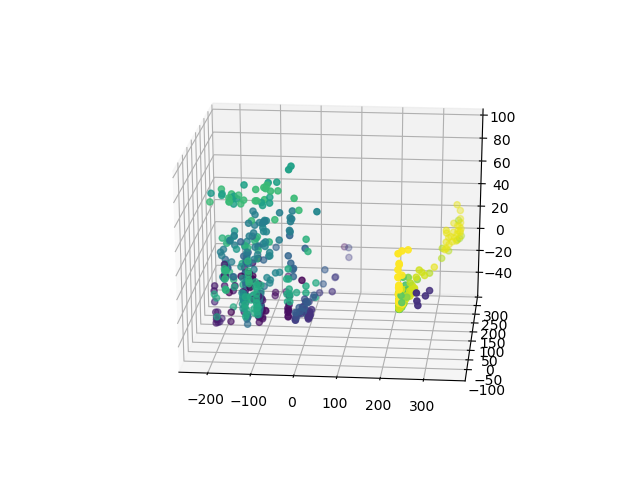

In [17]:
#Redução de dimencionalidade
pca = PCA(n_components=3)

#Separando as features que iremos usar
x = dfData.loc[:, bestComb].values

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['c1', 'c2', 'c3'])

#Juntando as 'melhores' features com suas labels
finalDf = pd.concat([principalDf, dfData[['label']]], axis = 1)

#Plot 3D dos atributos por cluster
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')
ax1.scatter(finalDf['c1'], finalDf['c2'], finalDf['c3'], c = finalDf['label'], marker = 'o')
plt.show()

<IPython.core.display.Javascript object>


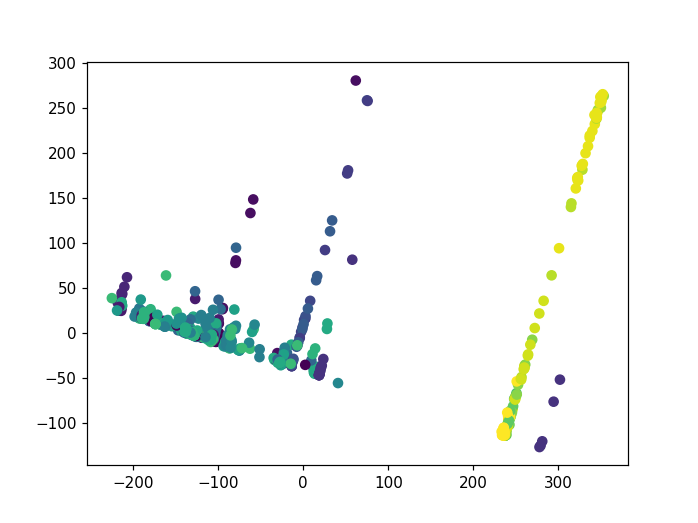

In [16]:
#Redução de dimencionalidade
pca = PCA(n_components=2)

#Separando as features que iremos usar
x = dfData.loc[:, bestComb].values

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['c1', 'c2'])

#Juntando as 'melhores' features com suas labels
finalDf = pd.concat([principalDf, dfData[['label']]], axis = 1)

#Plot 3D dos atributos por cluster
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(finalDf['c1'], finalDf['c2'], c = finalDf['label'], marker = 'o')
plt.show()

<IPython.core.display.Javascript object>


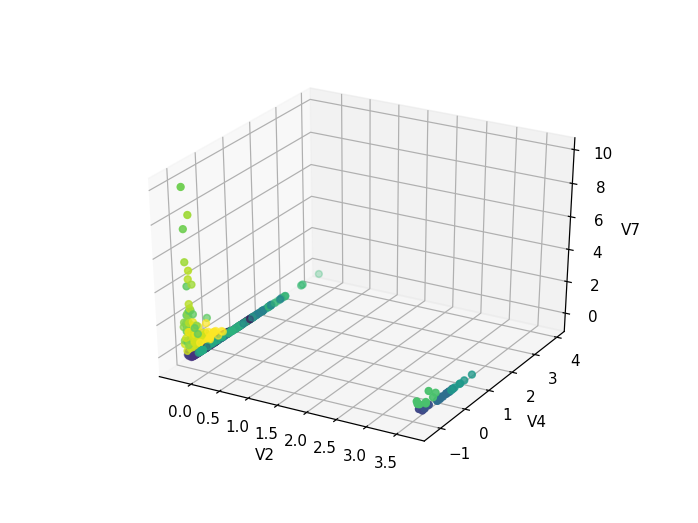

<IPython.core.display.Javascript object>


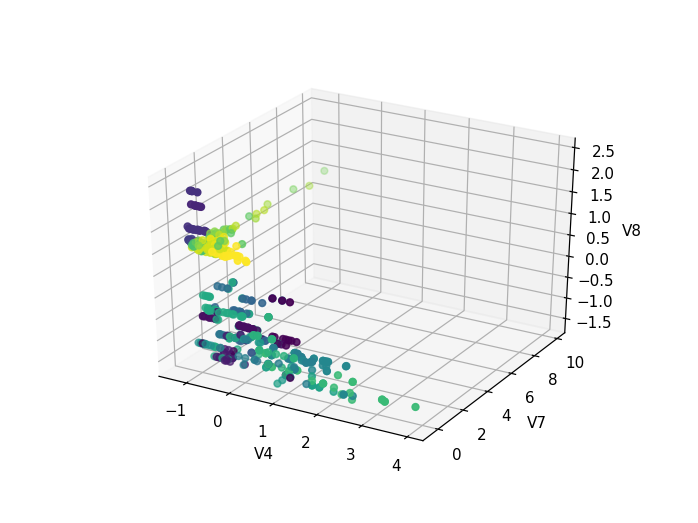

<IPython.core.display.Javascript object>


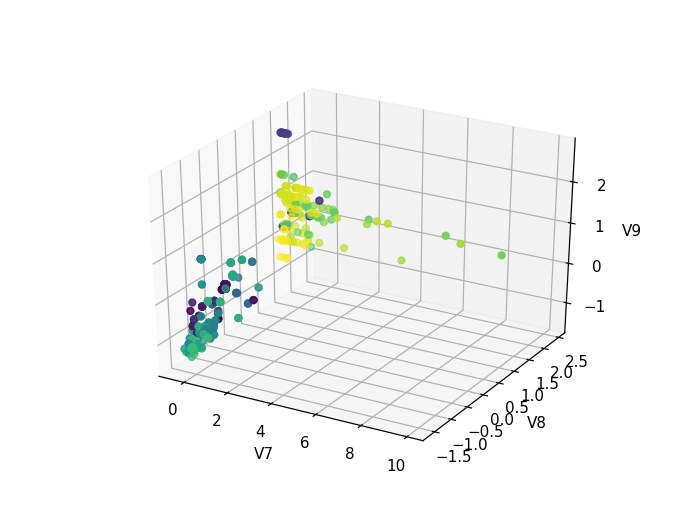

<IPython.core.display.Javascript object>


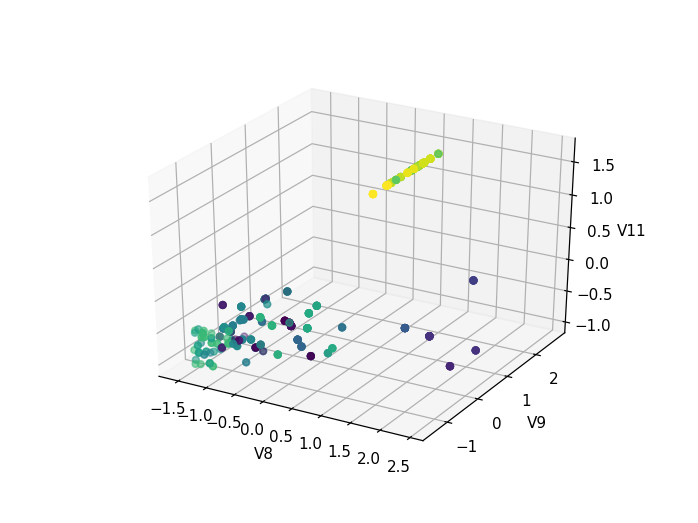

<IPython.core.display.Javascript object>


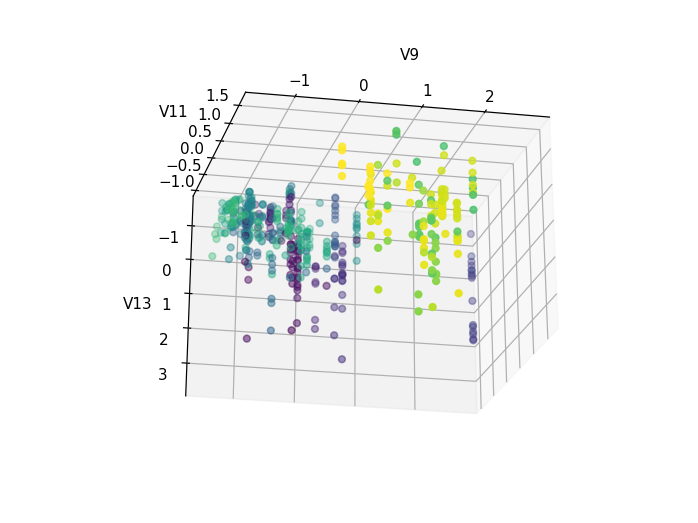

In [10]:
#Plot 3D dos atributos por cluster
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
fig = plt.figure()

ax1 = fig.add_subplot(111, projection = '3d')
ax1.scatter(best_data[1], best_data[3], best_data[6], c = best_data.label, marker = 'o')
ax1.set(xlabel='V2', ylabel='V4', zlabel='V7')
plt.show()

fig = plt.figure()
ax2 = fig.add_subplot(111, projection = '3d')
ax2.scatter(best_data[3], best_data[6], best_data[7], c = best_data.label, marker = 'o')
ax2.set(xlabel='V4', ylabel='V7', zlabel='V8')
plt.show()

fig = plt.figure()
ax3 = fig.add_subplot(111, projection = '3d')
ax3.scatter(best_data[6], best_data[7], best_data[8], c = best_data.label, marker = 'o')
ax3.set(xlabel='V7', ylabel='V8', zlabel='V9')
plt.show()

fig = plt.figure()
ax4 = fig.add_subplot(111, projection = '3d')
ax4.scatter(best_data[7], best_data[8], best_data[10], c = best_data.label, marker = 'o')
ax4.set(xlabel='V8', ylabel='V9', zlabel='V11')
plt.show()

fig = plt.figure()
ax5 = fig.add_subplot(111, projection = '3d')
ax5.scatter(best_data[8], best_data[10], best_data[12], c = best_data.label, marker = 'o')
ax5.set(xlabel='V9', ylabel='V11', zlabel='V13')
plt.show()


### Análize do modelo:


Achei curioso não usar V13 pq ela tem uma parada interessante e tal -> printar grafico do v13 em baixo

0.2521 29 clusters v1-v12


<IPython.core.display.Javascript object>


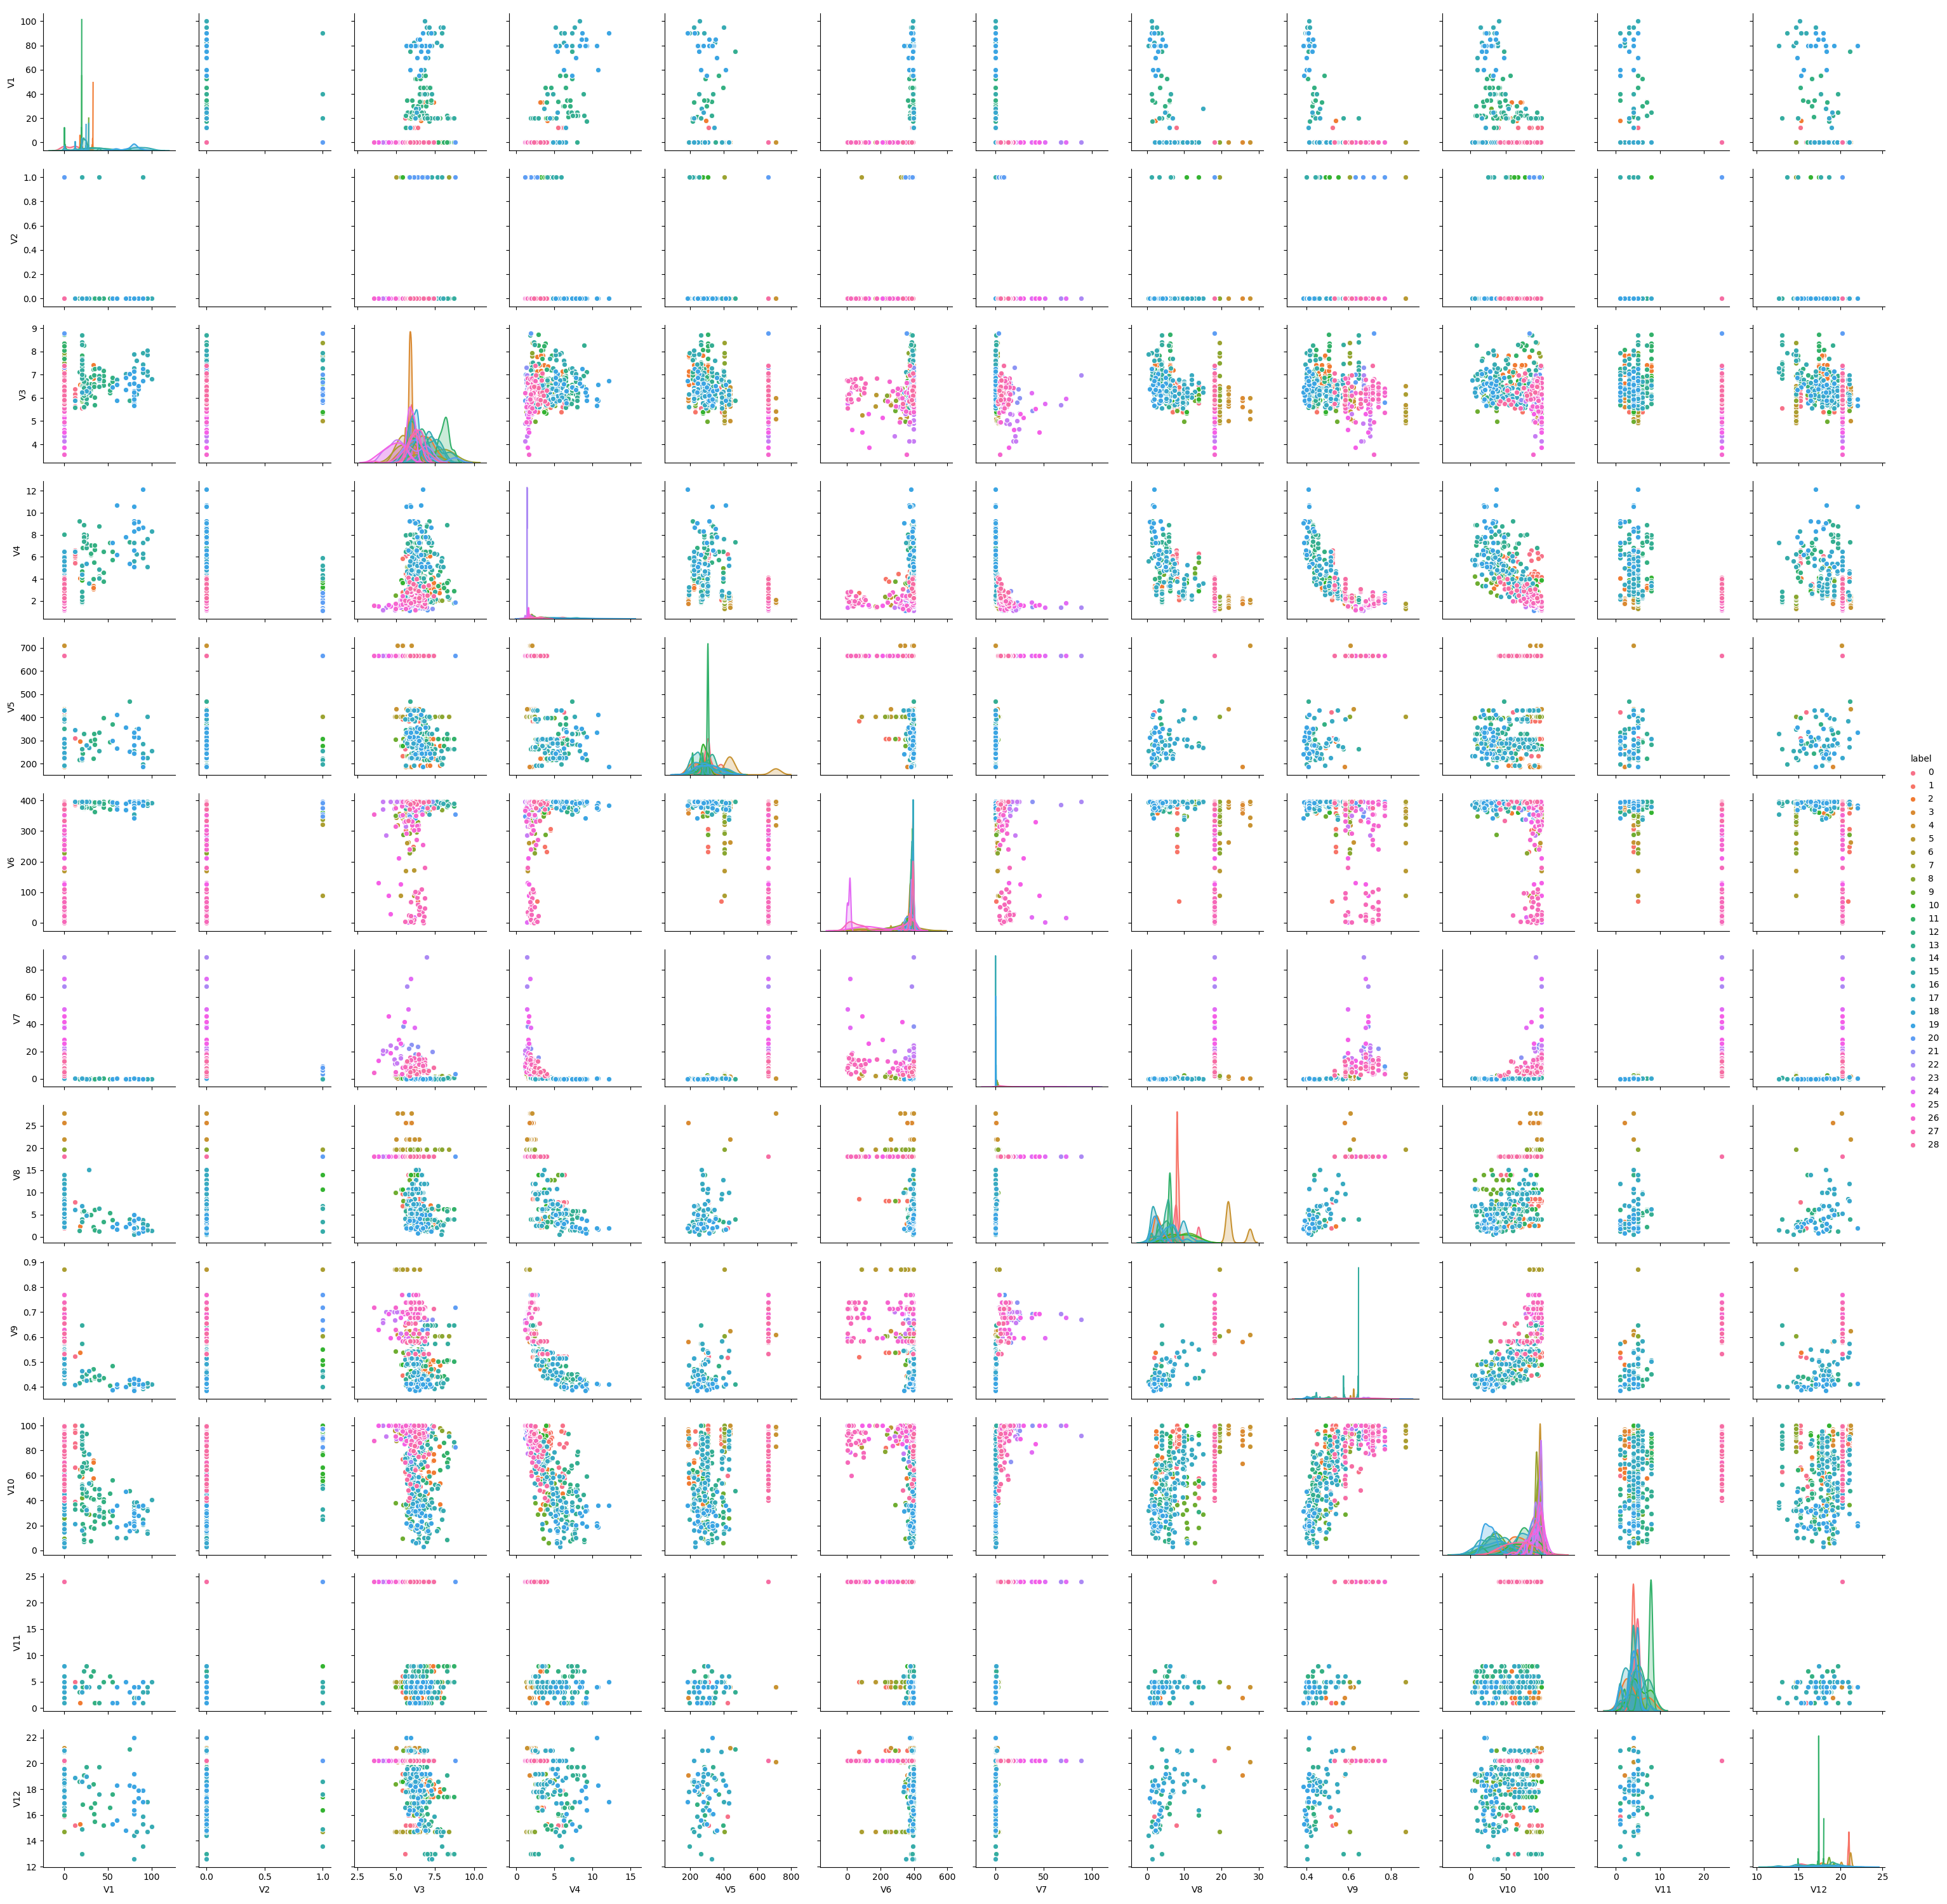

In [21]:
#Plot 2D de cada atributo colorido por cluster
sns.pairplot(data=dfData, vars=bestComb, hue='label')
plt.show()

## Aglomerative Clustering

In [ ]:
# Inicialização de variaveis
best_sil = -999
data = dfData

for k in range(2,4):
    # Define o modelo de clustering 
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', compute_full_tree='auto', linkage='ward')
    for i in range(1,14):
        for comb in combinations(atributos,i):
            newDf = dfData.filter(comb,axis=1)  # copiando apenas os atributos que serão usados
            data = scale(newDf)
            labels = model.fit_predict(data, 0)# execução do fit para fazer a predição
            data = scale(dfData)
            sil = metrics.silhouette_score(data, model.labels_,
                                               metric="euclidean")#calculo da silhuette para avaliar a predição feita
            
            if sil > best_sil: #comparação da silhoette atual com a melhor silhouette
                # Definição dos melhores dados até o momento
                bestEstimator = model
                best_sil = sil
                bestComb = comb     
                best_data = pd.DataFrame(data)
                


print('better estimator silhouette: %0.4f (%d clusters)' % (best_sil, bestEstimator.n_clusters))
print(bestComb)

dfData['label'] = bestEstimator.labels_
best_data['label'] = bestEstimator.labels_

In [ ]:
#Plot 3D dos atributos por cluster
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
fig = plt.figure()

ax1 = fig.add_subplot(111, projection = '3d')
ax1.scatter(best_data[1], best_data[3], best_data[6], c = best_data.label, marker = 'o')
ax1.set(xlabel='V2', ylabel='V4', zlabel='V7')
plt.show()

fig = plt.figure()
ax2 = fig.add_subplot(111, projection = '3d')
ax2.scatter(best_data[3], best_data[6], best_data[7], c = best_data.label, marker = 'o')
ax2.set(xlabel='V4', ylabel='V7', zlabel='V8')
plt.show()

fig = plt.figure()
ax3 = fig.add_subplot(111, projection = '3d')
ax3.scatter(best_data[6], best_data[7], best_data[8], c = best_data.label, marker = 'o')
ax3.set(xlabel='V7', ylabel='V8', zlabel='V9')
plt.show()

fig = plt.figure()
ax4 = fig.add_subplot(111, projection = '3d')
ax4.scatter(best_data[7], best_data[8], best_data[10], c = best_data.label, marker = 'o')
ax4.set(xlabel='V8', ylabel='V9', zlabel='V11')
plt.show()

fig = plt.figure()
ax5 = fig.add_subplot(111, projection = '3d')
ax5.scatter(best_data[8], best_data[10], best_data[12], c = best_data.label, marker = 'o')
ax5.set(xlabel='V9', ylabel='V11', zlabel='V13')
plt.show()


### Análize do modelo:

   O AgglomerativeClustering executa um agrupamento hierárquico usando uma abordagem de baixo para cima: cada observação começa em seu próprio cluster e os clusters são mesclados sucessivamente.
   
   0.4380 2 cluster V7

## Análize Geral: